In [1]:
# Importo librerie

import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
# Importo il dataset 

dataset = pd.read_csv('abbigliamento.csv', names=['taglia','colore','prezzo'])
dataset

# Taglia: variabile categorica ordinale
# Colore: variabile categorica nominale

,taglia,colore,prezzo
0,S,bianco,4.99
1,M,bianco,19.99
2,XL,bianco,12.99
3,XL,bianco,14.99
4,S,bianco,14.99
5,S,verde,7.99
6,M,verde,4.99
7,L,verde,12.49
8,XL,bianco,12.49
9,M,verde,19.99


## Preprocessing

### 1.  Tutte le colonne devono essere composte da numeri

Lo si fa perchè i computer capiscono solo i numeri ! Dunque così facendo facilitiamo il lavoro alla macchina, la quale non dovrà perdere tempo a decodificare (e ricodificare) le lettere in numeri !

#### Variabili categoriche ordinali

Basta sostituire i labels con dei numeri che rispecchino lo stesso ordine.

In [3]:
# Lo facciamo manualmente tramite l'utilizzo di un dizionario

size_mapping = {'S':0,'M':1,'L':2, 'XL':3}

# map accepts a dict or a Series. Values that are not found in the dict are converted to NaN, unless the 
# dict has a default value (e.g. defaultdict):

dataset['taglia'] = dataset['taglia'].map(size_mapping)
print(dataset.dtypes)
print(dataset['taglia'].describe())

taglia      int64
colore     object
prezzo    float64
dtype: object
count    10.000000
mean      1.400000
std       1.264911
min       0.000000
25%       0.250000
50%       1.000000
75%       2.750000
max       3.000000
Name: taglia, dtype: float64


In teoria sarebbe corretto assegnare alla feature 'taglia' il type '**category**', essendo variabile categorica, in maniera che il metodo *describe* non la rileva come variabile numerica.

In [4]:
dataset['taglia'] = dataset['taglia'].astype('category')

print(dataset.dtypes)
print(dataset['taglia'].describe())

taglia    category
colore      object
prezzo     float64
dtype: object
count     10
unique     4
top        3
freq       3
Name: taglia, dtype: int64


#### Variabili Categoriche Nominali

Per il livello nominale si usa il **One-Hot Encoding** (o **dummizzazione**), che consiste nel generare nuove colonne corrispondenti ai valori assunti dalla variabile categorica nominale.

In [5]:
# Su pandas si fa con la funz get_dummies, che genera le variabili dummy

dataset = pd.get_dummies(dataset,columns=['colore'])
dataset

,taglia,prezzo,colore_bianco,colore_verde
0,0,4.99,1,0
1,1,19.99,1,0
2,3,12.99,1,0
3,3,14.99,1,0
4,0,14.99,1,0
5,0,7.99,0,1
6,1,4.99,0,1
7,2,12.49,0,1
8,3,12.49,1,0
9,1,19.99,0,1


### 2. Trattamento dei valori nulli

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   taglia         10 non-null     category
 1   prezzo         10 non-null     float64 
 2   colore_bianco  10 non-null     uint8   
 3   colore_verde   10 non-null     uint8   
dtypes: category(1), float64(1), uint8(2)
memory usage: 430.0 bytes


Non essendoci valori nullinel dataset, li andremo a generare noi ai fini didattici.

In [7]:
dataset.iloc[0,1]=np.NAN
dataset.iloc[3,1]=np.NAN
dataset.iloc[5,1]=np.NAN

In [8]:
dataset         # la colonna colore presenta ora alcuni valori nulli

,taglia,prezzo,colore_bianco,colore_verde
0,0,NaN,1,0
1,1,19.99,1,0
2,3,12.99,1,0
3,3,NaN,1,0
4,0,14.99,1,0
5,0,NaN,0,1
6,1,4.99,0,1
7,2,12.49,0,1
8,3,12.49,1,0
9,1,19.99,0,1


Come trattare i valori mancanti ?

#### Metodo 1. Rimozione righe/colonne contenenti valori mancanti

In [9]:
# Rimozione righe contenenti almeno un valore nullo
dataset.dropna()

,taglia,prezzo,colore_bianco,colore_verde
1,1,19.99,1,0
2,3,12.99,1,0
4,0,14.99,1,0
6,1,4.99,0,1
7,2,12.49,0,1
8,3,12.49,1,0
9,1,19.99,0,1


In [10]:
# Rigenero celle con valori mancanti
dataset = pd.read_csv('abbigliamento.csv', names=['taglia','colore','prezzo'])
dataset.iloc[0,2]=np.NAN    
dataset.iloc[7,0]=np.NAN
dataset

,taglia,colore,prezzo
0,S,bianco,NaN
1,M,bianco,19.99
2,XL,bianco,12.99
3,XL,bianco,14.99
4,S,bianco,14.99
5,S,verde,7.99
6,M,verde,4.99
7,NaN,verde,12.49
8,XL,bianco,12.49
9,M,verde,19.99


In [11]:
# Rimozione colonne contenenti almeno un valore nullo
dataset.dropna(axis=1)
# rimane solo la colonna che non contiene nessun valore nullo

,colore
0,bianco
1,bianco
2,bianco
3,bianco
4,bianco
5,verde
6,verde
7,verde
8,bianco
9,verde


Questo primo metodo è generalmente sconsigliato perchè rimuovere colonne e/o righe vuol dire perdere dei dati.

#### Metodo 2. Imputazione dei dati mancanti

L'imputazione dei dati mancanti consiste in una sostituzione di tali dati con una stima di essi, ad es con la media.

La **media** ha senso nei valori quantitativi, come ad es il prezzo, ma ha meno senso se i valori sono qualitativi o booleani.
In ogni caso si usa il metodo *fillna*

In [12]:
# Importo dataset
dataset = pd.read_csv('abbigliamento.csv', names=['taglia','colore','prezzo'])
dataset

,taglia,colore,prezzo
0,S,bianco,4.99
1,M,bianco,19.99
2,XL,bianco,12.99
3,XL,bianco,14.99
4,S,bianco,14.99
5,S,verde,7.99
6,M,verde,4.99
7,L,verde,12.49
8,XL,bianco,12.49
9,M,verde,19.99


In [13]:
# Genero valori nulli nella colonna prezzo

dataset.iloc[1,2]=np.NAN
dataset.iloc[5,2]=np.NAN
dataset.iloc[3,0]=np.NAN
dataset.iloc[4,0]=np.NAN
dataset.iloc[2,1]=np.NAN
dataset.iloc[8,1]=np.NAN
dataset.iloc[0,1]=np.NAN
dataset

,taglia,colore,prezzo
0,S,NaN,4.99
1,M,bianco,NaN
2,XL,NaN,12.99
3,NaN,bianco,14.99
4,NaN,bianco,14.99
5,S,verde,NaN
6,M,verde,4.99
7,L,verde,12.49
8,XL,NaN,12.49
9,M,verde,19.99


In [14]:
# calcolo la media della colonna prezzo e la metto in fillna()

prz_medio = dataset['prezzo'].mean()
dataset['prezzo'] = dataset['prezzo'].fillna(prz_medio)
dataset

,taglia,colore,prezzo
0,S,NaN,4.99
1,M,bianco,12.24
2,XL,NaN,12.99
3,NaN,bianco,14.99
4,NaN,bianco,14.99
5,S,verde,12.24
6,M,verde,4.99
7,L,verde,12.49
8,XL,NaN,12.49
9,M,verde,19.99


In [15]:
# in merito alla colonna categoria 'colore' vado a riempire le celle vuote con la moda di tale distribuzione

colore_moda = dataset['colore'].mode()
dataset['colore']=dataset['colore'].fillna(colore_moda[0])
dataset

,taglia,colore,prezzo
0,S,verde,4.99
1,M,bianco,12.24
2,XL,verde,12.99
3,NaN,bianco,14.99
4,NaN,bianco,14.99
5,S,verde,12.24
6,M,verde,4.99
7,L,verde,12.49
8,XL,verde,12.49
9,M,verde,19.99


In [16]:
colore_moda

0    verde
dtype: object

In [17]:
# Avremmo anche potuto procedere su tutto il dataset e non sulle singole colonne

dataset = pd.read_csv('abbigliamento.csv', names=['taglia','colore','prezzo'])
dataset.iloc[1,2]=np.NAN
dataset.iloc[5,2]=np.NAN
dataset.iloc[3,0]=np.NAN
dataset.iloc[4,0]=np.NAN
dataset.iloc[2,1]=np.NAN
dataset.iloc[8,1]=np.NAN
dataset.iloc[0,1]=np.NAN
dataset

,taglia,colore,prezzo
0,S,NaN,4.99
1,M,bianco,NaN
2,XL,NaN,12.99
3,NaN,bianco,14.99
4,NaN,bianco,14.99
5,S,verde,NaN
6,M,verde,4.99
7,L,verde,12.49
8,XL,NaN,12.49
9,M,verde,19.99


In [18]:
# Ecco
colore_moda = dataset.mode()
dataset=dataset.fillna(colore_moda.iloc[0])
print(dataset)
colore_moda.iloc[0]

  taglia  colore  prezzo
0      S   verde    4.99
1      M  bianco    4.99
2     XL   verde   12.99
3      M  bianco   14.99
4      M  bianco   14.99
5      S   verde    4.99
6      M   verde    4.99
7      L   verde   12.49
8     XL   verde   12.49
9      M   verde   19.99


taglia        M
colore    verde
prezzo     4.99
Name: 0, dtype: object

### 3. Portare valori su una scala comune

Un articolo interessante e chiarificatore sul feature scaling lo trovi [qui](https://lorenzogovoni.com/ridimensionamento-dei-dati/)

In [19]:
# Nel nostro esempio utilizziamo un dataset di vini, di cui vogliamo solo alcune colonne

wines = pd.read_csv('wine.csv', usecols=[0,1,7], names=['classe','alcol','flavonoidi'])
wines.head()

,classe,alcol,flavonoidi
0,1,14.23,3.06
1,1,13.20,2.76
2,1,13.16,3.24
3,1,14.37,3.49
4,1,13.24,2.69


In [20]:
# Diamo un'occhiata ai principali indici statistici del dataframe
wines.describe()

# si vedono chiaramente i diversi ordini di grandezza

,classe,alcol,flavonoidi
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.029270
std,0.775035,0.811827,0.998859
min,1.000000,11.030000,0.340000
25%,1.000000,12.362500,1.205000
50%,2.000000,13.050000,2.135000
75%,3.000000,13.677500,2.875000
max,3.000000,14.830000,5.080000


#### Normalizzazione

Un metodo alternativo alla standardizzazione è la normalizzazione (o Min-Max Scaling). Nella normalizzazione, i dati vengono ridimensionati su un intervallo fisso, in genere da 0 a 1.

Essa è una buona tecnica da usare quando **non si conosce la distribuzione dei dati** o quando si sa che la distribuzione **non è gaussiana** (ossia non ha la forma di una curva a campana).

La formula è la seguente:

In [21]:
normalizzazione = Image(url='normalizzazione.png')
normalizzazione

La normalizzazione rende i dati più adatti ad una **convergenza** e una **comparazione**.

Lo svantaggio principale della normalizzazione min-max è che esso **non gestisce molto bene i valori anomali**. Ad esempio, se si dispone di 99 valori tra 0 e 40 e un valore è pari a 100, i 99 valori verranno tutti trasformati in un valore compreso tra 0 e 0,4.

In [22]:
# Pandas non ha un metodo per la normalizzazione ma possiamo facilmente procedere manualmente

vettore_max = wines[['alcol','flavonoidi']].max()  # array che contiene il max per ogni colonna
vettore_min = wines[['alcol','flavonoidi']].min()  # array che contiene il min per ogni colonna

In [23]:
# Utilizzo la formula di normalizzazione
features_norm = (wines[['alcol','flavonoidi']]-vettore_min)/(vettore_max-vettore_min)

In [24]:
features_norm

,alcol,flavonoidi
0,0.842105,0.573840
1,0.571053,0.510549
2,0.560526,0.611814
3,0.878947,0.664557
4,0.581579,0.495781
...,...,...
173,0.705263,0.056962
174,0.623684,0.086498
175,0.589474,0.073840
176,0.563158,0.071730


#### Standardizzazione

La standardizzazione dei dati è il processo di ridimensionamento di uno o più attributi in modo che abbiano un valore medio di 0 e una deviazione standard di 1.

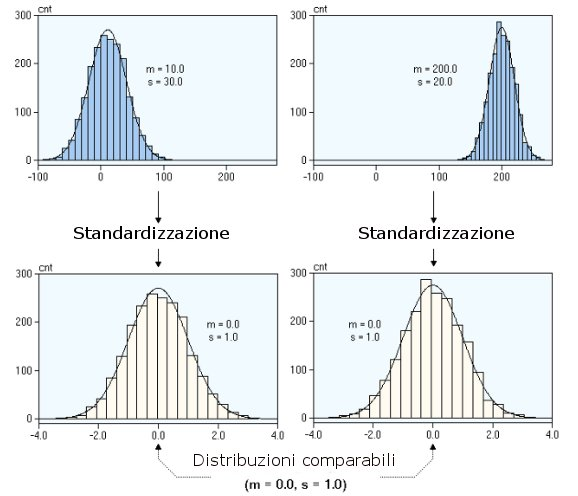

In [25]:
from IPython.display import Image
distributions = Image('standardization.jpg')
distributions

Come risultato otterremo che le caratteristiche saranno ridimensionate in modo da avere le proprietà di una distribuzione normale con **media nulla** e **deviazione standard pari a 1**. Il valore Z-standard viene calcolato come segue:



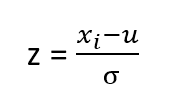

In [26]:
standardization = Image('standardizzazione.png')
standardization

dove **u** è la media dei campioni di addestramento, e **σ** è la deviazione standard dei campioni di addestramento e **xi** è il valore che si vuole standardizzare.

Il ridimensionamento dei dati viene eseguito su ciascuna caratteristica calcolando le statistiche pertinenti sui campioni nel set di allenamento. La media e la deviazione standard vengono memorizzate per essere utilizzate su dati successivi.

In [27]:
# Nel caso di Pandas si procede manualmente, non ci sono funzioni specifiche

# genero una copia del dataframe
wines_due = wines.copy()
wines_due = wines_due.drop('classe', axis=1)
wines_due.head()

,alcol,flavonoidi
0,14.23,3.06
1,13.20,2.76
2,13.16,3.24
3,14.37,3.49
4,13.24,2.69


In [28]:
array_medie = wines_due.mean().values  # array delle medie di ogni colonna
array_dvstd = wines_due.std().values   # array delle dev std di ogni colonna
wines_due_array = wines_due.values     # array bidim rappresentativo del dataframe

In [29]:
# Ora genero la tabella composta dai singoli valori standardizzati

wines_due_array_norm = (wines_due_array-array_medie)/array_dvstd

In [30]:
np.set_printoptions(suppress=True)   # elimina notazione scientifica
wines_due_array_norm

array([[ 1.51434077,  1.03190807],
       [ 0.24559683,  0.73156528],
       [ 0.19632522,  1.21211374],
       [ 1.6867914 ,  1.4623994 ],
       [ 0.29486844,  0.6614853 ],
       [ 1.47738706,  1.36228513],
       [ 1.7114272 ,  0.49129105],
       [ 1.30493643,  0.48127963],
       [ 2.25341491,  0.95181666],
       [ 1.05857838,  1.1220109 ],
       [ 1.35420804,  1.29220515],
       [ 1.37884384,  0.40118822],
       [ 0.92308146,  0.73156528],
       [ 2.15487169,  1.66262792],
       [ 1.6991093 ,  1.61257079],
       [ 0.77526663,  0.88173668],
       [ 1.60056608,  1.11199948],
       [ 1.02162467,  1.37229656],
       [ 1.46506916,  1.90290215],
       [ 0.78758453,  1.00187379],
       [ 1.30493643,  1.14203376],
       [-0.08698653,  0.38116537],
       [ 0.87380985,  0.8517024 ],
       [-0.18552975,  0.34111966],
       [ 0.6151339 ,  0.58139389],
       [ 0.06082829,  0.65147387],
       [ 0.47963697,  0.91177095],
       [ 0.36877585,  0.16091399],
       [ 1.07089628,

### 4. Training Set e Test Set

Con sklearn possiamo facilmente operare tale suddivisione.

In [31]:
# Innanzitutto importo un dataset di esempio

from sklearn.datasets import load_boston 
dataset = pd.read_csv('wine.csv', usecols=[0,1,7], names=['classe','alcol','flavonoidi'])
dataset

,classe,alcol,flavonoidi
0,1,14.23,3.06
1,1,13.20,2.76
2,1,13.16,3.24
3,1,14.37,3.49
4,1,13.24,2.69
...,...,...,...
173,3,13.71,0.61
174,3,13.40,0.75
175,3,13.27,0.69
176,3,13.17,0.68


In [32]:
# Genero il dataframe X delle features e y della variabile target

X = dataset[['alcol','flavonoidi']]
y = dataset['classe']

Importo la funzione sklearn per suddividere il dataset in **training set** e **test set**.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Con la funzione train_test_split vado a splittare il mio dataset (sia l'input composto da tutte le colonne tranne
# le prime 2 che l'output composto dalla sola colonna delle diagnosi) in 2 parti: la prima per il training, la seconda
# per il test.
# test_size rappresenta la percentuale del dataset che viene utilizzata per il testing (in questo caso il 30% per il
# testing e il 70% per il training)
# random_state rappresenta invece il seed del processo di generazione pseudo-casuale dei dataset di test e training;
# dunque cambiando il seed si avranno dataset di training e test diversi, mentre con stesso seed verranno generati
# sempre gli stessi dataset di training e test

In [34]:
print('Dimensione dataframe di training delle features:',X_train.shape)
print('Dimensione dataframe di test delle features:',X_test.shape)
print('Dimensione dataframe di training della variabile target:',y_train.shape)
print('Dimensione dataframe di test della variabile target:',y_test.shape)

Dimensione dataframe di training delle features: (124, 2)
Dimensione dataframe di test delle features: (54, 2)
Dimensione dataframe di training della variabile target: (124,)
Dimensione dataframe di test della variabile target: (54,)
